In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_excel("ENB2012_data.xlsx")

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [5]:
df.rename(columns={'X1':"Relative_Compactness",'X2':"Surface_Area",'X3':"Wall_Area",'X4':"Roof_Area",'X5':"Overall_Height",'X6':"Orientation",'X7':"Glazing_Area",'X8':"Glazing_Area_Distribution",'Y1':"Heating_Load",'Y2':"Cooling_Load"},inplace=True)

In [6]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
df.shape

(768, 10)

In [9]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [10]:
df.dtypes

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

##### Checking the relationship of independent features with output Heating and Cooling load, also the correlation between the independent features

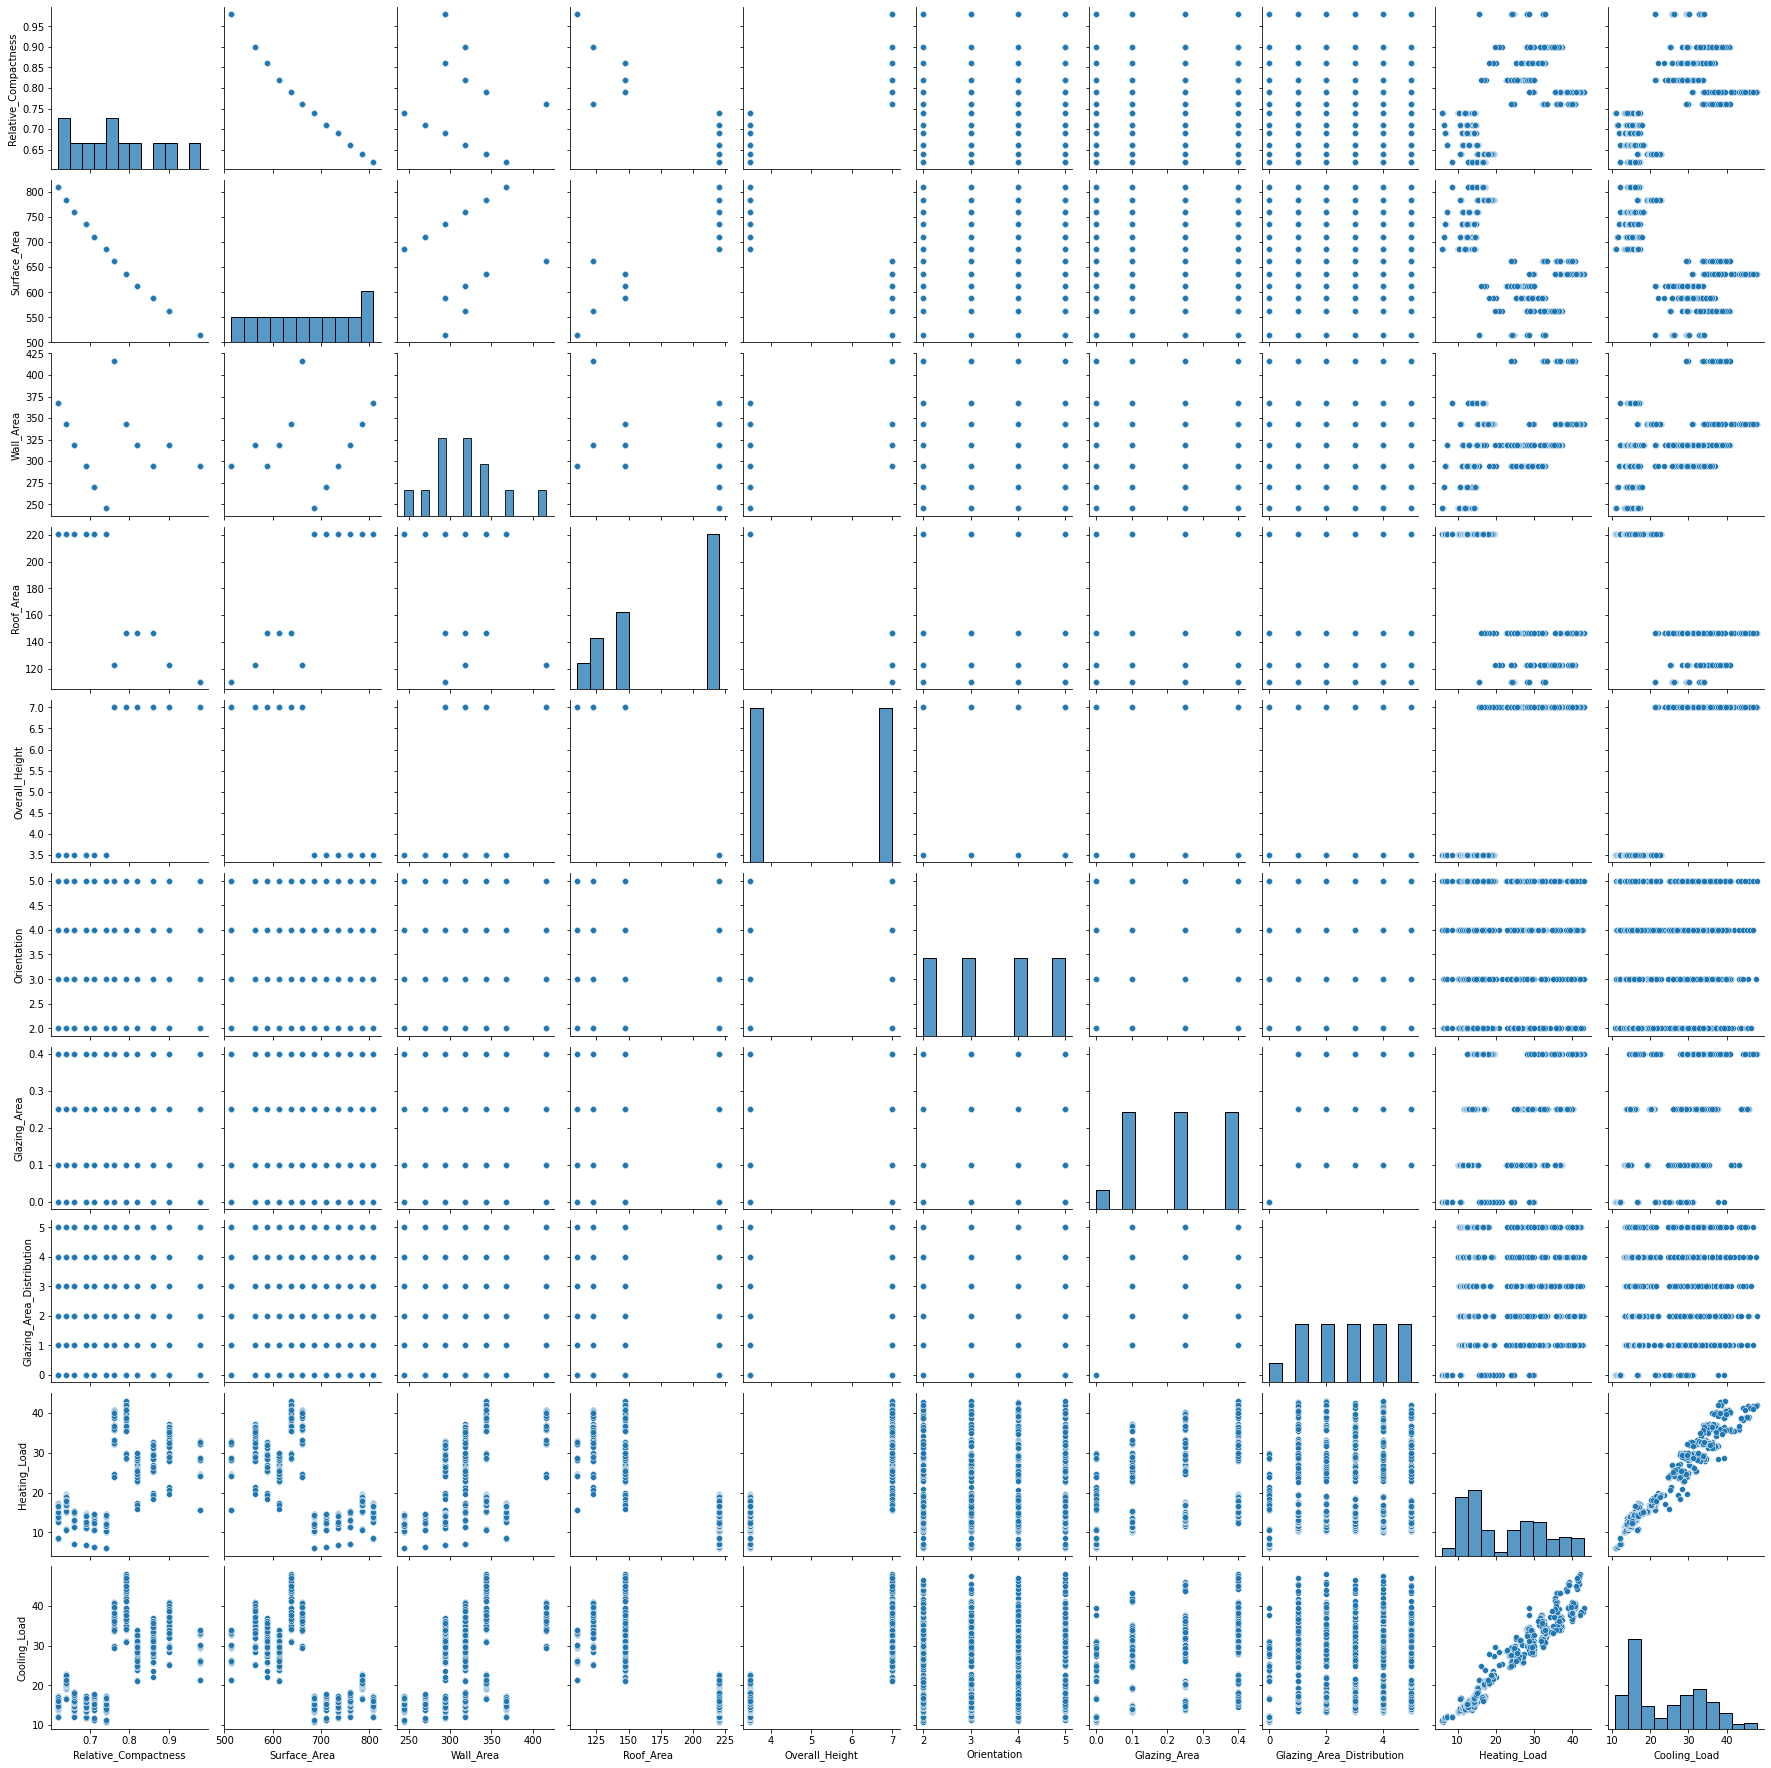

In [11]:
sns.pairplot(df)

<AxesSubplot:ylabel='Frequency'>

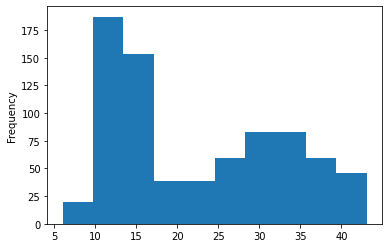

In [12]:
df['Heating_Load'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

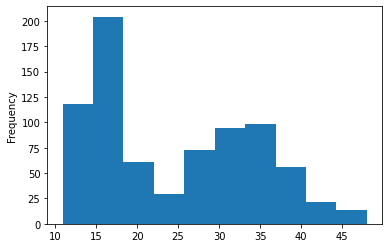

In [13]:
df['Cooling_Load'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

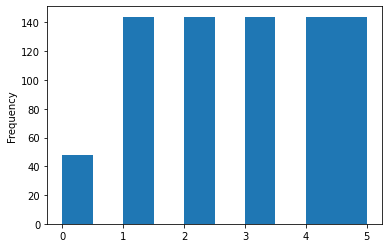

In [14]:
df['Glazing_Area_Distribution'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

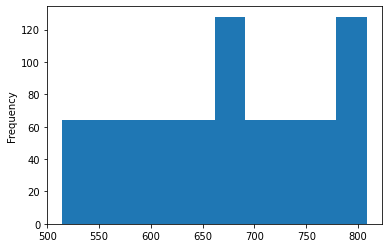

In [15]:
df['Surface_Area'].plot(kind="hist")

<AxesSubplot:>

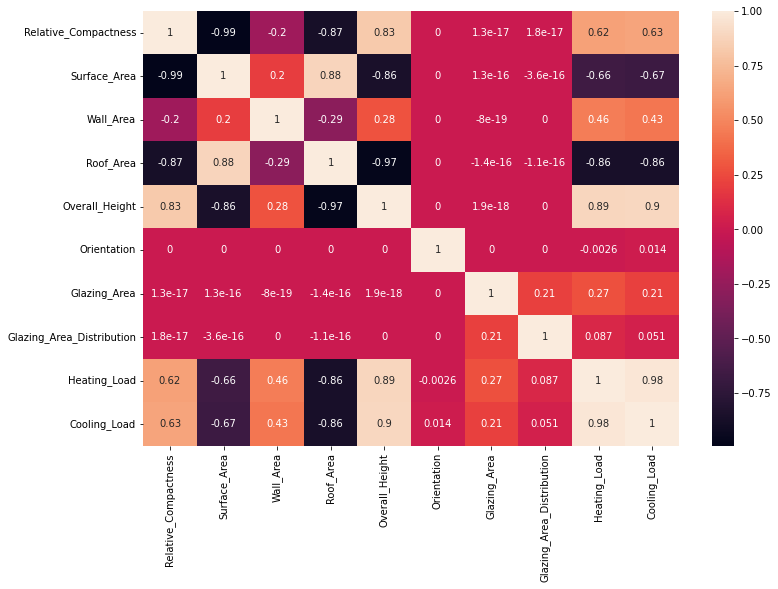

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),annot=True)

Observation:
1. From the above heatmap it is evident that Relative Compactness and Surface Area have negative correlation of 0.99
2. The Output Features Heating and Cooling Load is also having a correlation of 0.98

#### Train Test Split with StartifiedShuffleSplit to have the same kind of Distribution in train and test datasets

In [17]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


<AxesSubplot:xlabel='Relative_Compactness', ylabel='Count'>

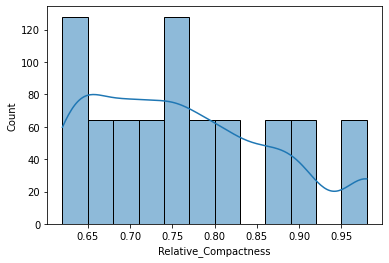

In [18]:
sns.histplot(df['Relative_Compactness'],kde=True)

<AxesSubplot:xlabel='Surface_Area', ylabel='Count'>

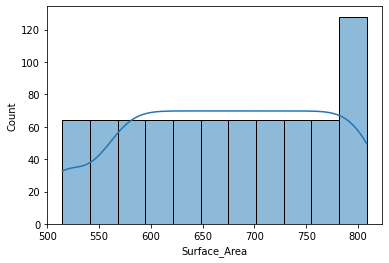

In [19]:
sns.histplot(df['Surface_Area'],kde=True)

<AxesSubplot:xlabel='Orientation', ylabel='Count'>

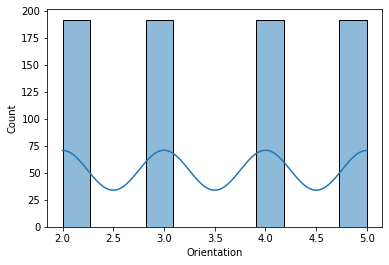

In [20]:
sns.histplot(df['Orientation'],kde=True)

#### From the above statistical information we have Surface Area holding the max values so we choose the group category for StartifiedShuffleSplit based on Surface Area into 5bins labelled as 1,2,3,4,5 to have our train test split 
or
#### Group Category based on Orientation

##### Group Category Based on Surface Area below:

In [21]:
df["surface_area_cat"] = pd.cut(
                df["Surface_Area"],
                bins=[500.0,550.0,600.0,700.0,800.0,np.inf],
                labels = [1,2,3,4,5]
)

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df,df["surface_area_cat"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [24]:
train_set

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,surface_area_cat
327,0.66,759.5,318.5,220.50,3.5,5,0.25,1,13.18,16.19,4
239,0.62,808.5,367.5,220.50,3.5,5,0.10,4,13.00,14.47,5
351,0.82,612.5,318.5,147.00,7.0,5,0.25,2,24.94,29.88,3
525,0.62,808.5,367.5,220.50,3.5,3,0.25,5,13.99,14.61,5
228,0.66,759.5,318.5,220.50,3.5,2,0.10,4,11.44,14.86,4
...,...,...,...,...,...,...,...,...,...,...,...
176,0.69,735.0,294.0,220.50,3.5,2,0.10,3,11.22,14.44,4
717,0.62,808.5,367.5,220.50,3.5,3,0.40,4,16.90,16.79,5
48,0.98,514.5,294.0,110.25,7.0,2,0.10,1,24.58,26.47,1
509,0.71,710.5,269.5,220.50,3.5,3,0.25,5,12.19,14.71,4


In [25]:
train_set.shape

(614, 11)

In [26]:
test_set

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,surface_area_cat
477,0.62,808.5,367.5,220.50,3.5,3,0.25,4,14.61,15.56,5
404,0.76,661.5,416.5,122.50,7.0,2,0.25,3,35.99,36.07,3
194,0.98,514.5,294.0,110.25,7.0,4,0.10,4,24.04,26.18,1
606,0.71,710.5,269.5,220.50,3.5,4,0.40,2,14.40,17.27,4
570,0.64,784.0,343.0,220.50,3.5,4,0.40,1,19.48,22.72,4
...,...,...,...,...,...,...,...,...,...,...,...
250,0.86,588.0,294.0,147.00,7.0,4,0.10,5,25.36,32.04,2
224,0.69,735.0,294.0,220.50,3.5,2,0.10,4,11.18,14.29,4
191,0.62,808.5,367.5,220.50,3.5,5,0.10,3,12.73,13.89,5
546,0.79,637.0,343.0,147.00,7.0,4,0.40,1,42.50,38.35,3


In [27]:
test_set.shape

(154, 11)

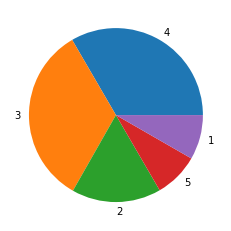

In [28]:
plt.pie(train_set.surface_area_cat.value_counts(),labels=train_set.surface_area_cat.value_counts().index)
plt.show()

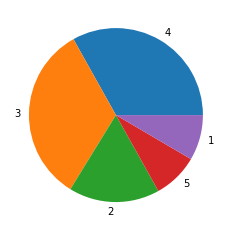

In [29]:
plt.pie(test_set.surface_area_cat.value_counts(),labels=test_set.surface_area_cat.value_counts().index)
plt.show()

In [30]:
train_set.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.764007,671.714984,317.023616,177.345684,5.215798,3.482085,0.231270,2.793160,21.976085,24.307248
std,0.105019,87.255621,44.461008,45.258007,1.751092,1.124619,0.132393,1.556301,10.059878,9.520593
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.690000,612.500000,294.000000,147.000000,3.500000,2.000000,0.100000,1.000000,12.860000,15.382500
50%,0.740000,686.000000,318.500000,220.500000,3.500000,3.000000,0.250000,3.000000,17.605000,21.330000
75%,0.820000,735.000000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000,31.652500,32.957500
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,42.960000,47.590000


In [31]:
test_set.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.764805,671.681818,324.386364,173.647727,5.386364,3.571429,0.246753,2.889610,23.627338,25.706169
std,0.109097,91.615009,39.718516,44.821210,1.750371,1.095786,0.136204,1.532061,10.135670,9.432072
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.370000,11.270000
25%,0.660000,594.125000,294.000000,128.625000,3.500000,3.000000,0.100000,2.000000,14.622500,16.832500
50%,0.760000,661.500000,318.500000,147.000000,7.000000,4.000000,0.250000,3.000000,23.900000,25.255000
75%,0.850000,759.500000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,31.682500,33.840000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


##### Group Category Based on Orientation

In [32]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index_orientation, test_index_orientation in split.split(df,df["Orientation"]):
    train_set_orientation = df.loc[train_index_orientation]
    test_set_orientation = df.loc[test_index_orientation]

In [33]:
train_set_orientation.shape

(614, 11)

In [34]:
test_set_orientation.shape

(154, 11)

In [35]:
train_set_orientation.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.761710,673.750000,317.662052,178.043974,5.187296,3.501629,0.232166,2.750814,21.912818,24.163632
std,0.105211,87.626491,44.035136,45.235286,1.750302,1.118944,0.133513,1.535270,10.038246,9.334213
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.660000,612.500000,294.000000,147.000000,3.500000,3.000000,0.100000,1.000000,12.950000,15.537500
50%,0.740000,686.000000,318.500000,220.500000,3.500000,3.500000,0.250000,3.000000,17.510000,21.330000
75%,0.820000,759.500000,343.000000,220.500000,7.000000,4.750000,0.400000,4.000000,29.917500,32.830000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


In [36]:
test_set_orientation.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.773961,663.568182,321.840909,170.863636,5.500000,3.493506,0.243182,3.058442,23.879584,26.278766
std,0.107797,89.721957,41.930058,44.572352,1.737702,1.121663,0.132111,1.593438,10.176201,10.050787
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.040000,11.170000
25%,0.690000,588.000000,294.000000,122.500000,3.500000,2.250000,0.100000,2.000000,13.920000,16.057500
50%,0.760000,661.500000,318.500000,147.000000,7.000000,3.500000,0.250000,3.000000,24.970000,27.730000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000,32.512500,33.927500
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,42.960000,46.940000


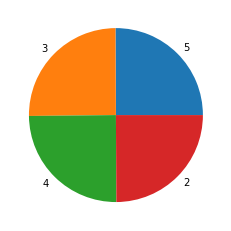

In [37]:
plt.pie(train_set_orientation.Orientation.value_counts(),labels=train_set_orientation.Orientation.value_counts().index)
plt.show()

In [38]:
train_set_orientation.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,surface_area_cat
145,0.98,514.5,294.0,110.25,7.0,3,0.10,3,24.40,26.02,1
261,0.76,661.5,416.5,122.50,7.0,3,0.10,5,33.21,34.35,3
507,0.74,686.0,245.0,220.50,3.5,5,0.25,5,12.02,14.03,3
293,0.90,563.5,318.5,122.50,7.0,3,0.25,1,33.48,33.17,2
425,0.64,784.0,343.0,220.50,3.5,3,0.25,3,16.93,20.03,4


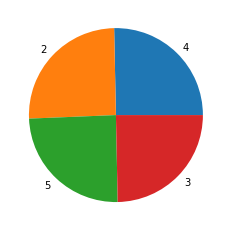

In [39]:
plt.pie(test_set_orientation.Orientation.value_counts(),labels=test_set_orientation.Orientation.value_counts().index)
plt.show()

In [40]:
test_set_orientation.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,surface_area_cat
209,0.79,637.0,343.0,147.0,7.0,3,0.10,4,35.89,43.30,3
520,0.64,784.0,343.0,220.5,3.5,2,0.25,5,16.73,20.13,4
713,0.64,784.0,343.0,220.5,3.5,3,0.40,4,19.13,21.54,4
462,0.71,710.5,269.5,220.5,3.5,4,0.25,4,12.17,15.20,4
749,0.71,710.5,269.5,220.5,3.5,3,0.40,5,12.63,14.58,4


##### ...Continued on Energy Efficiency EDA_2.ipynb